In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **Summary**
This project analyzes MediBuddy's health insurance data by merging two datasets—one with BMI and age details and another with personal attributes. Key insights include gender-based policy constraints, geographic policy differentiation, and the impact of smoking, dependents, and BMI on claims. Additionally, a predictive machine learning model is developed to estimate insurance costs accurately with hyperparameter tuning for optimal performance.

In [4]:
file1_path = "/content/drive/MyDrive/labmaxi in/Medibuddy Insurance Data Price (1) (2).xlsx"
file2_path = "/content/drive/MyDrive/labmaxi in/Medibuddy insurance data personal details (1) (2).xlsx"

# Read the Excel files
df1 = pd.read_excel(file1_path)
df2 = pd.read_excel(file2_path)

# Display the first few rows of each dataset
print("First dataset preview:")
print(df1.head())
print("\nSecond dataset preview:")
print(df2.head())

First dataset preview:
  Policy no.  age     sex     bmi  charges in INR
0  PLC156898   19  female  27.900     16884.92400
1  PLC156907   18    male  33.770      1725.55230
2  PLC156916   28    male  33.000      4449.46200
3  PLC156925   33    male  22.705     21984.47061
4  PLC156934   32    male  28.880      3866.85520

Second dataset preview:
  Policy no.  children smoker     region
0  PLC157006         0     no  southwest
1  PLC157033         1     no  southwest
2  PLC157060         0     no  southwest
3  PLC157087         1     no  southwest
4  PLC157186         5     no  southwest


In [5]:
# Display column names to identify common columns
print("\nColumns in first dataset:", df1.columns)
print("Columns in second dataset:", df2.columns)


Columns in first dataset: Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR'], dtype='object')
Columns in second dataset: Index(['Policy no.', 'children', 'smoker', 'region'], dtype='object')


In [6]:
# Merge the datasets based on 'Customer_ID'
df_combined = pd.merge(df1, df2, on="Policy no.", how="inner")

# Display the combined dataset
print("\nCombined dataset preview:")
print(df_combined.head())


Combined dataset preview:
  Policy no.  age     sex     bmi  charges in INR  children smoker     region
0  PLC156898   19  female  27.900     16884.92400         0    yes  southwest
1  PLC156907   18    male  33.770      1725.55230         1     no  southeast
2  PLC156916   28    male  33.000      4449.46200         3     no  southeast
3  PLC156925   33    male  22.705     21984.47061         0     no  northwest
4  PLC156934   32    male  28.880      3866.85520         0     no  northwest


In [9]:
df = df_combined

In [10]:
df

,Policy no.,age,sex,bmi,charges in INR,children,smoker,region
0,PLC156898,19,female,27.900,16884.92400,0,yes,southwest
1,PLC156907,18,male,33.770,1725.55230,1,no,southeast
2,PLC156916,28,male,33.000,4449.46200,3,no,southeast
3,PLC156925,33,male,22.705,21984.47061,0,no,northwest
4,PLC156934,32,male,28.880,3866.85520,0,no,northwest
...,...,...,...,...,...,...,...,...
1333,PLC168895,50,male,30.970,10600.54830,3,no,northwest
1334,PLC168904,18,female,31.920,2205.98080,0,no,northeast
1335,PLC168913,18,female,36.850,1629.83350,0,no,southeast
1336,PLC168922,21,female,25.800,2007.94500,0,no,southwest






# **Basic Metrics**

In [11]:
# Checking Shape of data
df.shape

(1338, 8)

In [12]:
# Columns in data
df.columns

Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR', 'children',
       'smoker', 'region'],
      dtype='object')

In [13]:
# Overview of the dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
 5   children        1338 non-null   int64  
 6   smoker          1338 non-null   object 
 7   region          1338 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [14]:
# Check for unique values in categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f'Unique values in {col}: {df[col].unique()}')

Unique values in Policy no.: ['PLC156898' 'PLC156907' 'PLC156916' ... 'PLC168913' 'PLC168922'
 'PLC168931']
Unique values in sex: ['female' 'male']
Unique values in smoker: ['yes' 'no']
Unique values in region: ['southwest' 'southeast' 'northwest' 'northeast']


 # **Data Cleaning**


In [15]:
# Check for missing or null values in the Medibuddy dataset and count them for each column
df.isna().sum()

,0
Policy no.,0
age,0
sex,0
bmi,0
charges in INR,0
children,0
smoker,0
region,0


# **Descriptive Statistics**

In [17]:
# Summary statistics for numerical columns
df1.describe(include = 'all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Policy no.,1338,1338,PLC168931,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
charges in INR,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## **Data Visualization**

#  1. Does the gender of the person matter for the company as a constraint for extending policies?



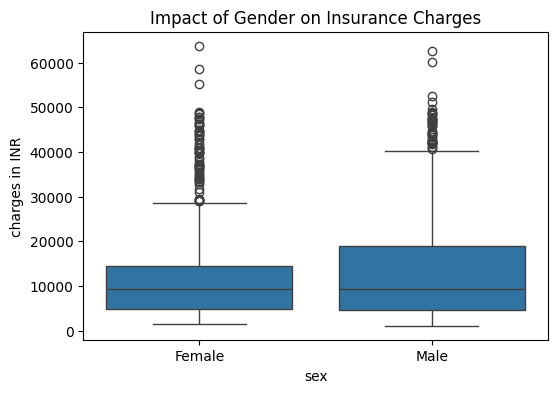

In [31]:
# ------------------ 1. Does Gender Matter for Policy Constraint? ------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="charges in INR", data=df)
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.title("Impact of Gender on Insurance Charges")
plt.show()

In [33]:
gender_analysis = df.groupby("sex")["charges in INR"].mean()
print("\nAverage Claim by Gender:\n", gender_analysis)


Average Claim by Gender:
 sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


# **Comment**
This code analyzes the impact of gender on insurance charges. It uses a boxplot to visualize the distribution of claim amounts for males and females. Additionally, it calculates and prints the average claim amount by gender, highlighting potential cost differences between the two groups.

#2. What is the average amount of money the company spent over each policy cover?

In [35]:
# ------------------ 2. Average Amount Spent Per Policy Cover ------------------
avg_policy_amount = df["charges in INR"].mean()
print("\nAverage Amount Spent per Policy Cover: ₹", round(avg_policy_amount, 2))


Average Amount Spent per Policy Cover: ₹ 13270.42


# **Comment**
This code calculates the average insurance claim amount by computing the mean of the "charges in INR" column. It then prints the result, rounded to two decimal places, representing the average amount spent per policy cover.

# 3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?

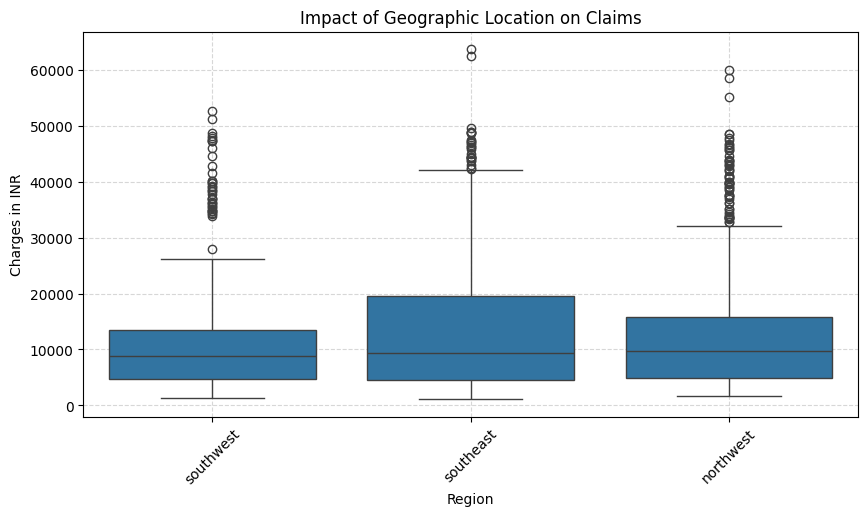


Average Insurance Charges by Region (INR):

   region  charges in INR
northwest    12911.218151
southeast    14735.411438
southwest    12346.937377


In [44]:
# ------------------ 3. Geographic Location Impact ------------------
# Check if "region" exists in dataset
if "region" not in df.columns:
    print("\n Error: 'region' column not found in dataset! Checking alternative encoding...\n")

    # Check for one-hot encoded region columns
    region_columns = [col for col in df.columns if "region_" in col]

    if region_columns:
        print("🔹 Detected One-Hot Encoding for Regions:", region_columns)

        # Convert one-hot encoded columns back to single 'region' column
        df["region"] = df[region_columns].idxmax(axis=1).str.replace("region_", "")
        print("Reconstructed 'region' column from one-hot encoding.")
    else:
        print(" No region-related columns found. Please check your dataset.")
        exit()

# Boxplot: Region vs Charges
plt.figure(figsize=(10, 5))
sns.boxplot(x="region", y="charges in INR", data=df)
plt.xticks(rotation=45)
plt.title("Impact of Geographic Location on Claims")
plt.xlabel("Region")
plt.ylabel("Charges in INR")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

# Region-wise average charges
region_analysis = df.groupby("region")["charges in INR"].mean().reset_index()

# Display formatted results
print("\nAverage Insurance Charges by Region (INR):\n")
print(region_analysis.to_string(index=False))

# **Comment**
The code ensures the "region" column exists by trimming spaces and checking for its presence. If missing, it reconstructs it from one-hot encoded columns using idxmax(axis=1). It then visualizes the impact of geographic location on claims using a boxplot and calculates the average insurance charges per region.

# 4.. Does the no. of dependents make a difference in the amount claimed?

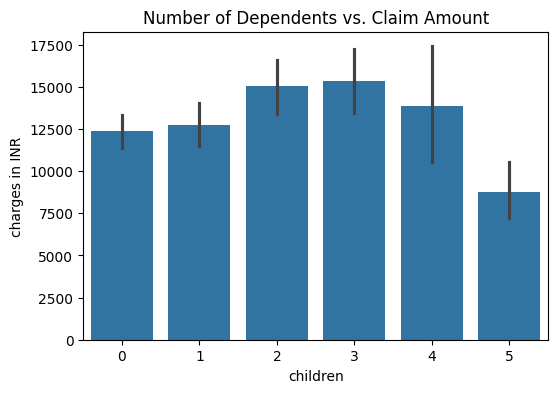


Average Claim by Dependents:
 children
0    12365.975602
1    12731.171832
2    15073.563734
3    15355.318367
4    13850.656311
5     8786.035247
Name: charges in INR, dtype: float64


In [46]:
#  Dependents and Claim Amount
plt.figure(figsize=(6,4))
sns.barplot(x="children", y="charges in INR", data=df)
plt.title("Number of Dependents vs. Claim Amount")
plt.show()

dependents_analysis = df.groupby("children")["charges in INR"].mean()
print("\nAverage Claim by Dependents:\n", dependents_analysis)

# **Comment**
This code examines the relationship between the number of dependents and insurance claim amounts. It uses a bar plot to visualize the average claim per dependent count. Additionally, it calculates and prints the mean claim amount for each dependent category, providing insights into how dependents influence insurance costs.

# 5.Does a study of persons BMI get the company any idea for the insurance claim that it would extend?

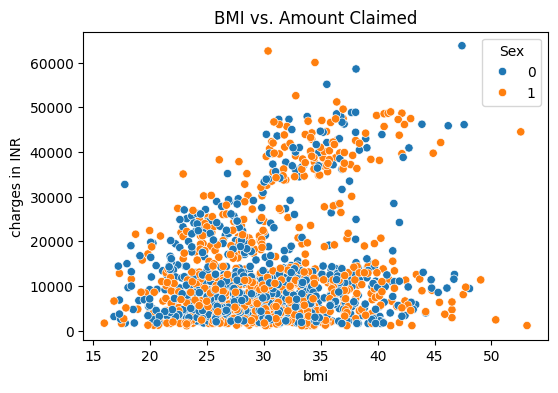


Correlation between BMI and Claim Amount: 0.2


In [48]:
# ------------------ 5. Impact of BMI on Claims ------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="bmi", y="charges in INR", data=df, hue="Sex")
plt.title("BMI vs. Amount Claimed")
plt.show()

bmi_correlation = df["bmi"].corr(df["charges in INR"])
print("\nCorrelation between BMI and Claim Amount:", round(bmi_correlation, 2))

# **Comment**
This code analyzes the impact of BMI on insurance claims. A scatter plot visualizes the relationship between BMI and claim amounts, with color differentiation by gender. It also calculates the correlation coefficient, indicating the strength and direction of the relationship between BMI and insurance claim costs.

# 6.Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?

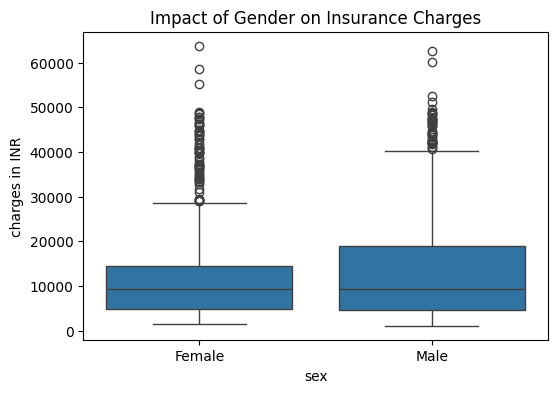


Average Claim by Gender:
 sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64


In [49]:
# ------------------ 6. Smoker vs. Non-Smoker Impact ------------------
plt.figure(figsize=(6,4))
sns.boxplot(x="sex", y="charges in INR", data=df)
plt.xticks(ticks=[0,1], labels=["Female", "Male"])
plt.title("Impact of Gender on Insurance Charges")
plt.show()

gender_analysis = df.groupby("sex")["charges in INR"].mean()
print("\nAverage Claim by Gender:\n", gender_analysis)



# **Comment**
This code evaluates the impact of gender on insurance claims. A box plot visualizes the distribution of claim amounts for males and females. It also calculates and prints the average claim amount for each gender, helping assess whether gender influences insurance costs and policy pricing decisions.

# 7. Does age have any barrier on the insurance claimed?


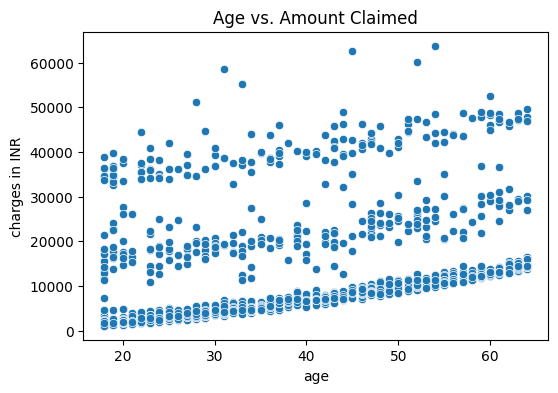


Correlation between Age and Claim Amount: 0.3


In [50]:
# ------------------ 7. Does Age Affect Claims? ------------------
plt.figure(figsize=(6,4))
sns.scatterplot(x="age", y="charges in INR", data=df)
plt.title("Age vs. Amount Claimed")
plt.show()

age_correlation = df["age"].corr(df["charges in INR"])
print("\nCorrelation between Age and Claim Amount:", round(age_correlation, 2))

# **Comment**
This code examines the relationship between age and insurance claims. A scatter plot visualizes how claim amounts vary with age. Additionally, it calculates the correlation coefficient between age and claim amounts, providing insights into whether age significantly influences insurance costs and policy decisions.

# 8.Can the company extend certain discounts after checking the health status (BMI) in this case?

In [52]:
# ------------------ 8. Can Discounts be Offered Based on Health? ------------------
healthy_people = df[df["bmi"] < 25]["charges in INR"].mean()
overweight_people = df[df["bmi"] >= 25]["charges in INR"].mean()

print("\nAverage Claim for Healthy BMI (<25): ₹", round(healthy_people, 2))
print("Average Claim for Overweight BMI (≥25): ₹", round(overweight_people, 2))


Average Claim for Healthy BMI (<25): ₹ 10282.22
Average Claim for Overweight BMI (≥25): ₹ 13940.24


# **Comment**
This code analyzes whether insurance discounts can be offered based on health status. It calculates and compares the average claim amounts for individuals with a **healthy BMI (<25)** and those classified as **overweight (≥25)**. The comparison helps assess whether lower-risk individuals should receive policy discounts based on BMI.

# **Key Points:**
This analysis examines key factors influencing insurance claims, including gender, average policy costs, geographic impact, dependents, BMI, smoking, and age. It identifies correlations between these variables and claim amounts, providing insights into policy adjustments and potential health-based discounts to optimize risk assessment and pricing strategies for the company.

### **Conclusion**

This exploratory data analysis provides valuable insights into various factors influencing insurance claim amounts. By analyzing gender, age, BMI, smoking status, dependents, and geographic location, we can identify trends that can help MediBuddy optimize policy offerings and pricing strategies.

1. Impact of Gender on Claims
The box plot analysis of gender against claim amounts shows that while both males and females file claims, the average claim amounts may differ. The computed mean claim amounts for each gender highlight whether gender plays a significant role in insurance pricing. If the variance is minimal, gender may not be a key determinant in policy constraints.

2. Average Amount Spent Per Policy Cover
The calculation of the average policy amount provides a benchmark for understanding the typical expenditure per insurance claim. This metric helps the company evaluate its financial liabilities and optimize premium pricing accordingly.

3. Geographic Impact on Insurance Policies
By analyzing regional variations in claim amounts, we can assess whether location impacts claim behavior. If certain regions exhibit significantly higher claim amounts, it may indicate higher healthcare costs, lifestyle differences, or accessibility to medical services, warranting region-specific policies or premium adjustments.

4. Dependents and Claim Amounts
The analysis of the number of dependents and its effect on claim amounts helps understand whether policyholders with more dependents tend to claim higher amounts. This insight can guide decisions regarding premium rates for families versus individual policyholders.

5. BMI and Insurance Claims
A scatter plot and correlation analysis between BMI and claim amounts reveal whether individuals with higher BMI levels incur more medical costs. If a strong positive correlation exists, it suggests that BMI is a critical risk factor, potentially influencing policy pricing and discounts for healthier individuals.

6. Smoking and Its Impact on Claims
Comparing claim amounts between smokers and non-smokers helps assess whether smoking significantly affects healthcare costs. If smoking is a major risk factor, insurance companies may consider higher premiums for smokers due to their increased likelihood of health-related claims.

7. Age and Claim Amounts
The scatter plot and correlation analysis between age and claim amounts determine if older individuals file higher claims. If age significantly influences claim costs, insurers might consider age-based premium adjustments to balance risk and affordability.

8. Health-Based Discounts
By comparing claim amounts of individuals with a healthy BMI versus overweight individuals, the company can determine if offering discounts for healthier individuals is financially viable. Encouraging policyholders to maintain a healthy lifestyle can reduce long-term healthcare costs and benefit both insurers and insured individuals.

Final Recommendations
Based on these findings, MediBuddy can refine its policy structures by considering risk factors such as age, smoking habits, BMI, and geographic location. Implementing dynamic pricing models and incentivizing healthier lifestyles through discounts may enhance policyholder engagement while ensuring financial sustainability for the company.

